# TCLAB

### Import

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import *
import package_LAB
from package_LAB import *

## SYSTEM DYNAMICS

### Load data

In [7]:
nameFile = 'Open_loop_experiment_on_MV_2022-04-27-00h39.txt' #notre sample at home

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'
    
print(ExpVariable)    
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('DATA/' + nameFile)
t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

MV


### Plot loaded data

(45.0, 55.0)

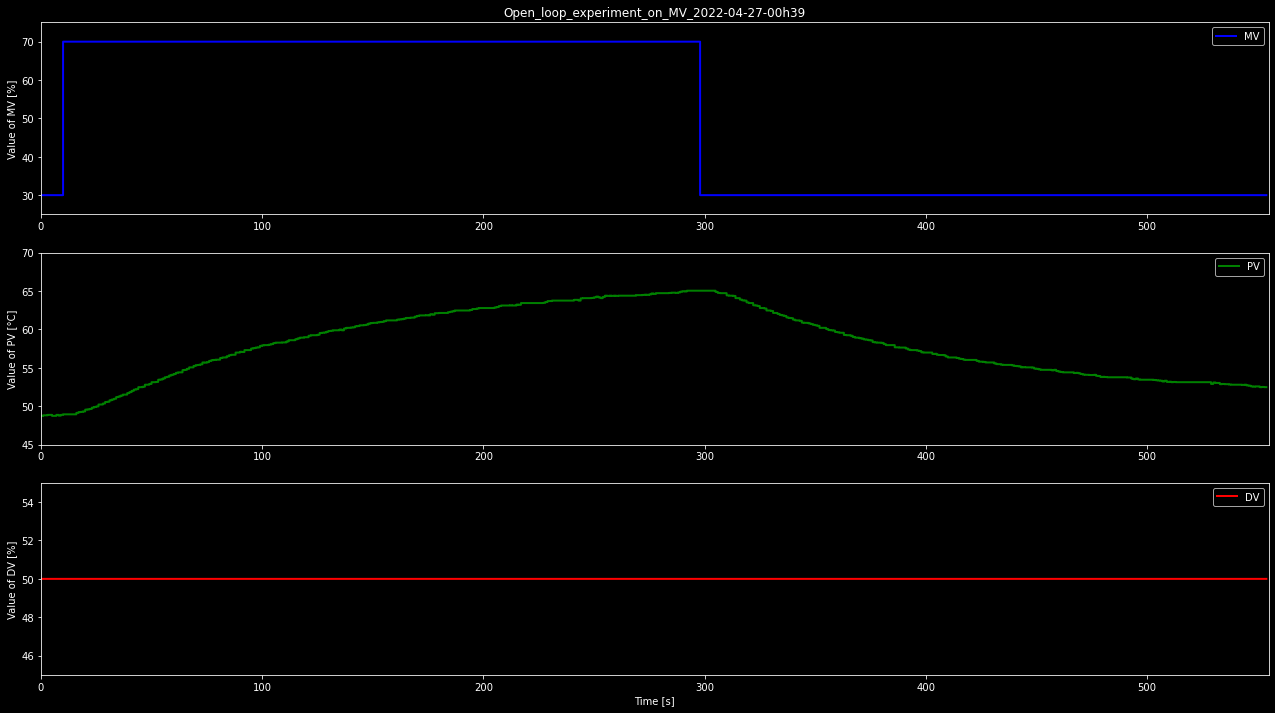

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t,MV)
l2.set_data(t,PV)
l3.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)

ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)

### Clean data

In [9]:
if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

### Plot cleaned data

(0.0, 555.0)

<Figure size 1584x1584 with 0 Axes>

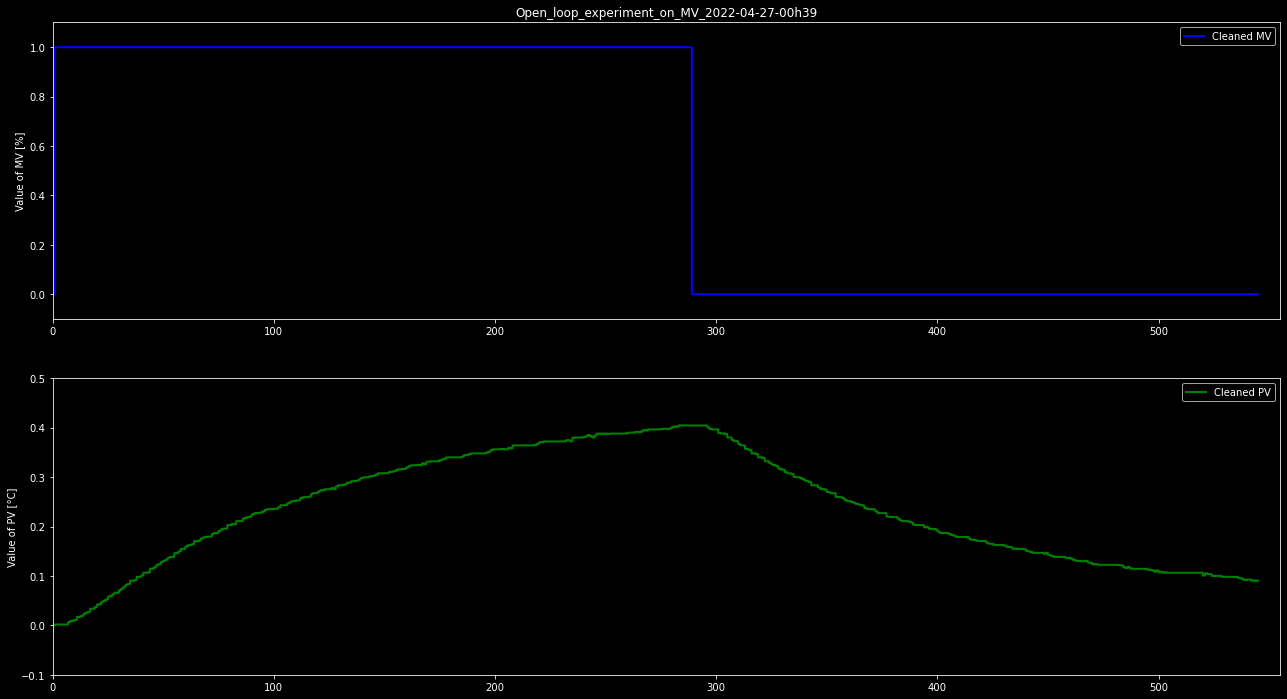

In [10]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)

if ExpVariable == 'MV':
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
    ax1.set_ylabel('Value of MV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,MVm)
    ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
else:
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned DV',where='post')
    ax1.set_ylabel('Value of DV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,DVm)
    ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1)     

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

## PROCESS IDENTIFICATION

### SOPDT identification

#### Optimisation parameters

In [11]:
Ts = 1.0

maxIter = 10

p0 = np.zeros(4)
p0[0] = 0.65 # K
p0[1] = 100.0 # T1
p0[2] = 20.0 # T2
p0[3] = 10.0 # theta

bnds = ((None, None), (0, None), (0, None), (0, None))

if ExpVariable == 'MV':
    cost = SOPDT_cost(p0,MVm,PVm,Ts)
else:
    cost = SOPDT_cost(p0,DVm,PVm,Ts)
    
print('Initial cost: ' + str(cost))

Initial cost: 8.764543641567673


#### Optimisation

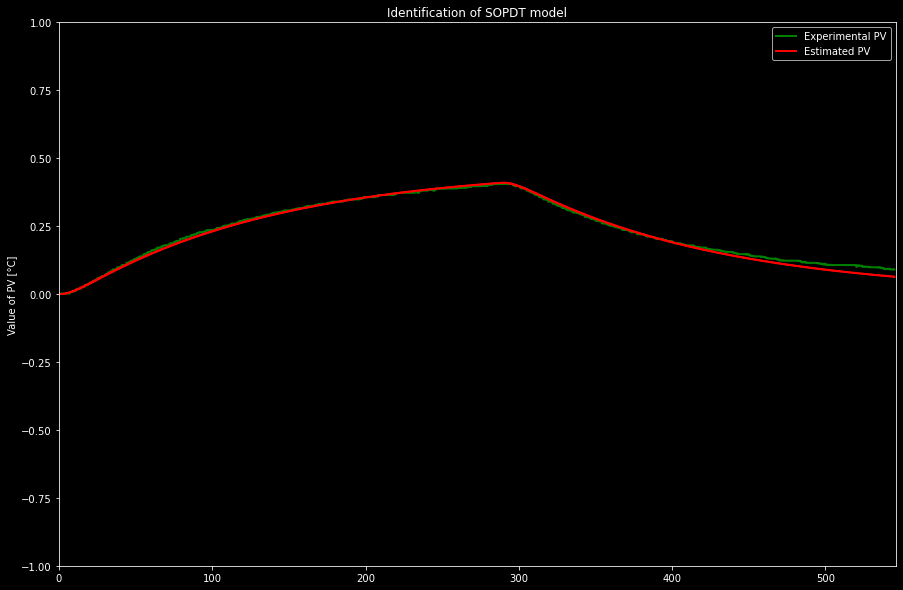

Final SSE Objective: 0.05747245175765793
K: 0.46575892823243076
T1: 132.04151002516983
T2: 7.647730018039972
theta: 0.0004910330468864688


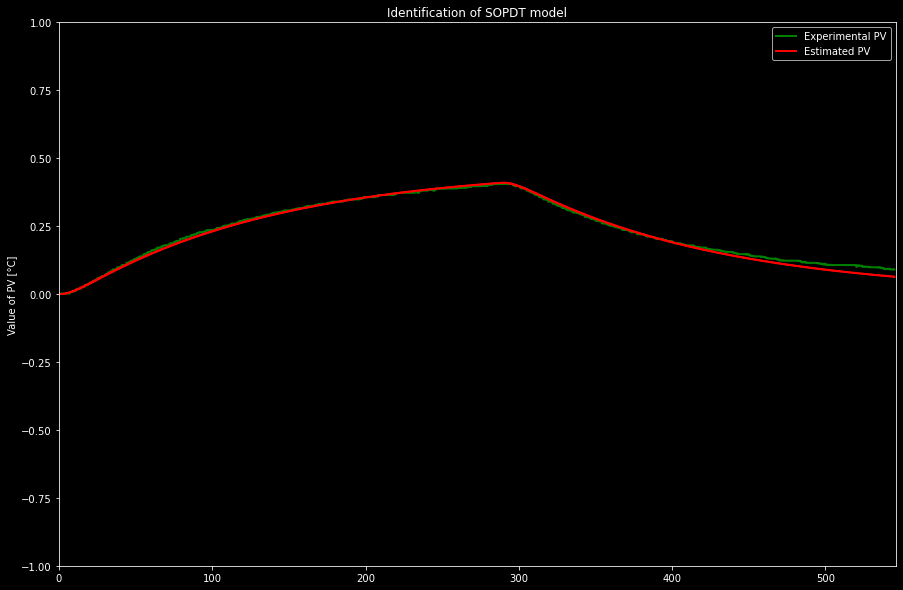

In [12]:
# optimize K, T1, T2, theta

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
l1, = ax1.step([0,1],[0,1],'g-',linewidth=2,label='Experimental PV',where='post')
l2, = ax1.step([0,1],[0,1],'r-',linewidth=2,label='Estimated PV',where='post')
ax1.set_ylabel('Value of PV [°C]')
ax1.set_title('Identification of SOPDT model')
ax1.legend(loc='best')

if ExpVariable == 'MV':
    solution = minimize(SOPDT_cost,p0,args=(MVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell',bounds=bnds,options={'maxiter': maxIter})
    p = solution.x
    print('Final SSE Objective: ' + str(SOPDT_cost(p,MVm,PVm,Ts)))
else:
    solution = minimize(SOPDT_cost,p0,args=(DVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell',bounds=bnds,options={'maxiter': maxIter})    
    p = solution.x
    print('Final SSE Objective: ' + str(SOPDT_cost(p,DVm,PVm,Ts)))

K = p[0]
T1 = np.max([0,p[1]])
T2 = np.max([0,p[2]])
theta  = np.max([0,p[3]])

print('K: ' + str(K))
print('T1: ' + str(T1))
print('T2: ' + str(T2))
print('theta: ' + str(theta))  

#### Plot experimental and simulated data

(0.0, 554.0)

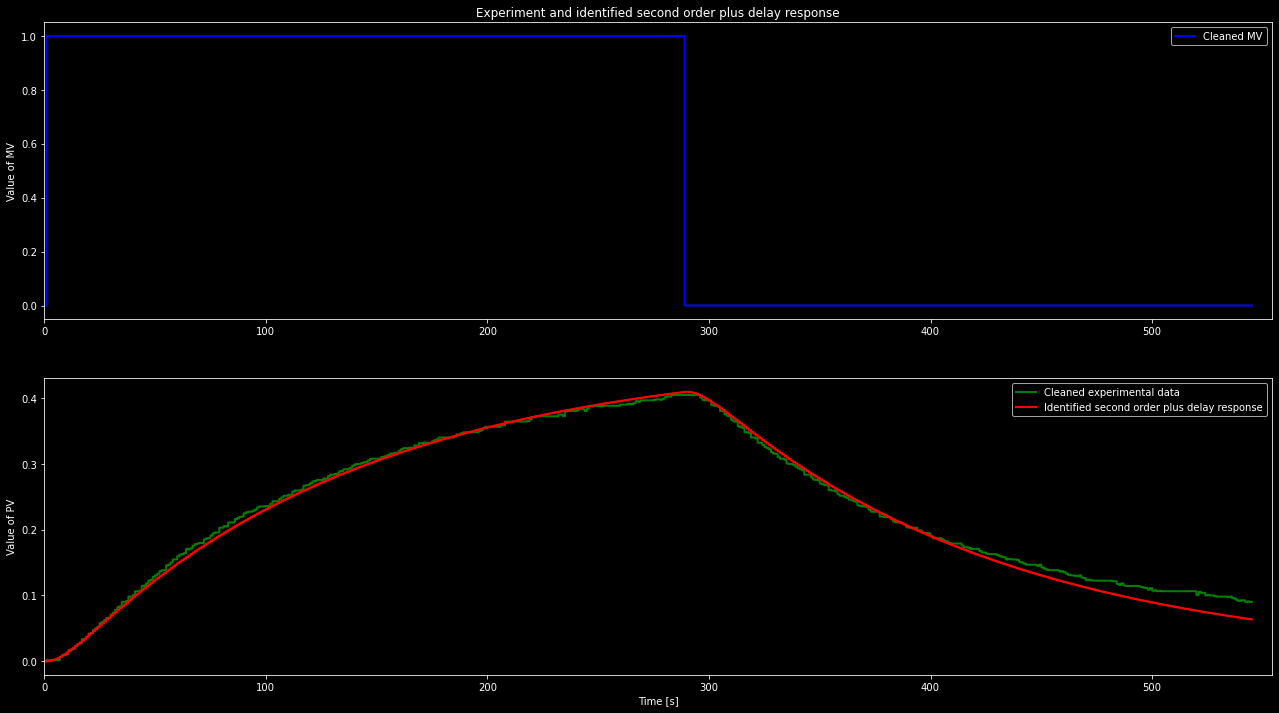

In [13]:
if ExpVariable == 'MV':
    PV_SOPDT_model = SOPDT(MVm,K,T1,T2,theta,Ts)
else:
    PV_SOPDT_model = SOPDT(DVm,K,T1,T2,theta,Ts)    

plt.figure(figsize = (22,12))

plt.subplot(2,1,1)
if ExpVariable == 'MV':
    plt.step(tm,MVm,'b-',linewidth=2,label='Cleaned MV',where='post')
    plt.ylabel('Value of MV')
else:
    plt.step(tm,DVm,'b-',linewidth=2,label='Cleaned DV',where='post')
    plt.ylabel('Value of DV') 
    
plt.title('Experiment and identified second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

plt.subplot(2,1,2)
plt.step(tm,PVm,'g-',linewidth=2,label='Cleaned experimental data',where='post')
plt.step(tm,PV_SOPDT_model,'r-',linewidth=2,label='Identified second order plus delay response',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

### FOPDT identification

#### Optimisation parameters

In [14]:
Ts = 1.0

maxIter = 500

p0 = np.zeros(3)
p0[0] = 0.5 # K
p0[1] = 100.0 # T
p0[2] = 10.0 # theta

bnds = ((None, None), (0, None), (0, None))

if ExpVariable == 'MV':
    cost = FOPDT_cost(p0,MVm,PVm,Ts)
else:
    cost = FOPDT_cost(p0,DVm,PVm,Ts)
    
print('Initial cost: ' + str(cost))

Initial cost: 1.3599035051490658


#### Optimisation

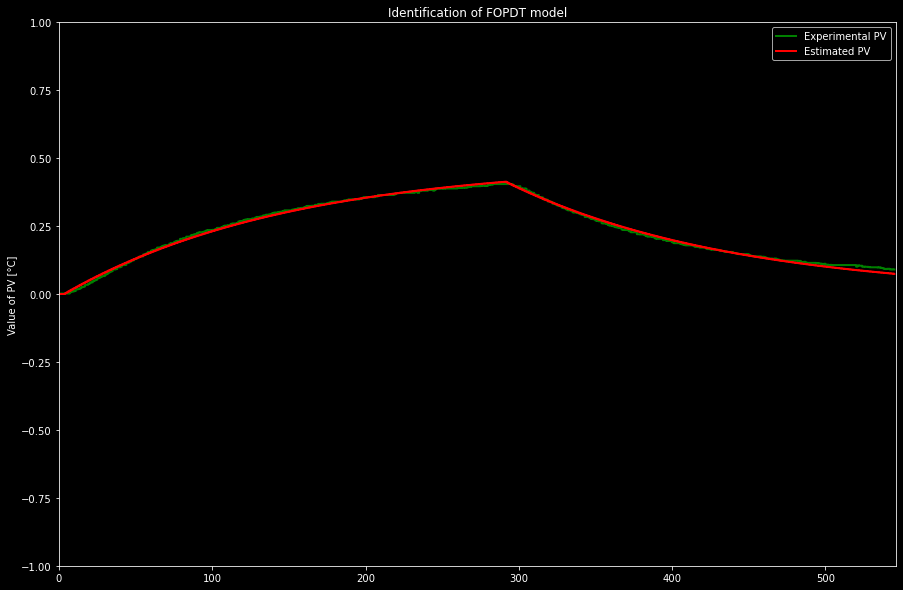

Final SSE Objective: 0.0267266956491962
K: 0.4817404740295075
T: 147.38681093535638
theta: 2.442958610918453


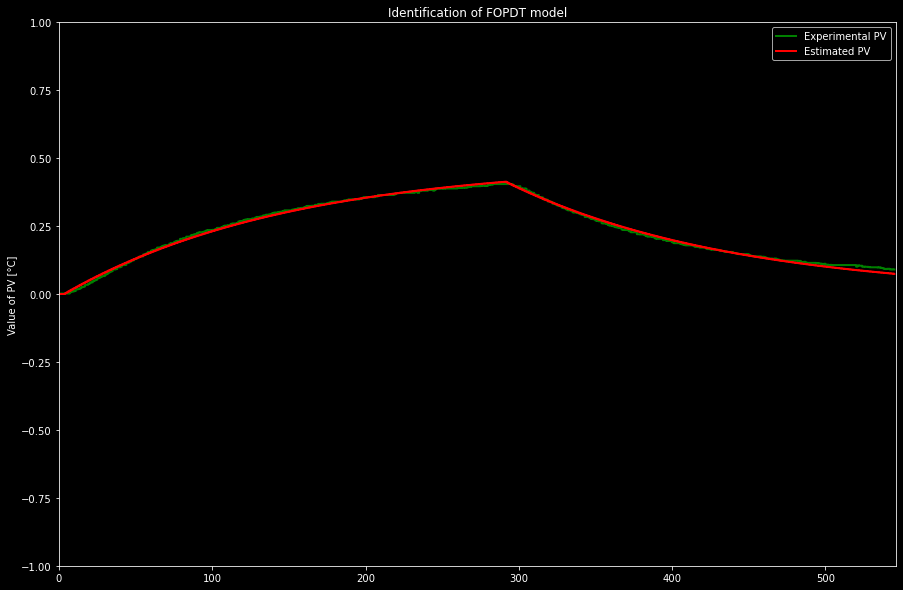

In [15]:
# optimize K, T, theta

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
l1, = ax1.step([0,1],[0,1],'g-',linewidth=2,label='Experimental PV',where='post')
l2, = ax1.step([0,1],[0,1],'r-',linewidth=2,label='Estimated PV',where='post')
ax1.set_ylabel('Value of PV [°C]')
ax1.set_title('Identification of FOPDT model')
ax1.legend(loc='best')

if ExpVariable == 'MV':
    solution = minimize(FOPDT_cost,p0,args=(MVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell',bounds=bnds,options={'maxiter': maxIter})    
    p = solution.x
    print('Final SSE Objective: ' + str(FOPDT_cost(p,MVm,PVm,Ts)))
else:
    solution = minimize(FOPDT_cost,p0,args=(DVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell',bounds=bnds,options={'maxiter': maxIter})    
    p = solution.x
    print('Final SSE Objective: ' + str(FOPDT_cost(p,DVm,PVm,Ts)))

K = p[0]
T = np.max([0,p[1]])
theta  = np.max([0,p[2]])

print('K: ' + str(K))
print('T: ' + str(T))
print('theta: ' + str(theta))  

#### Plot experimental and simulated data

(0.0, 554.0)

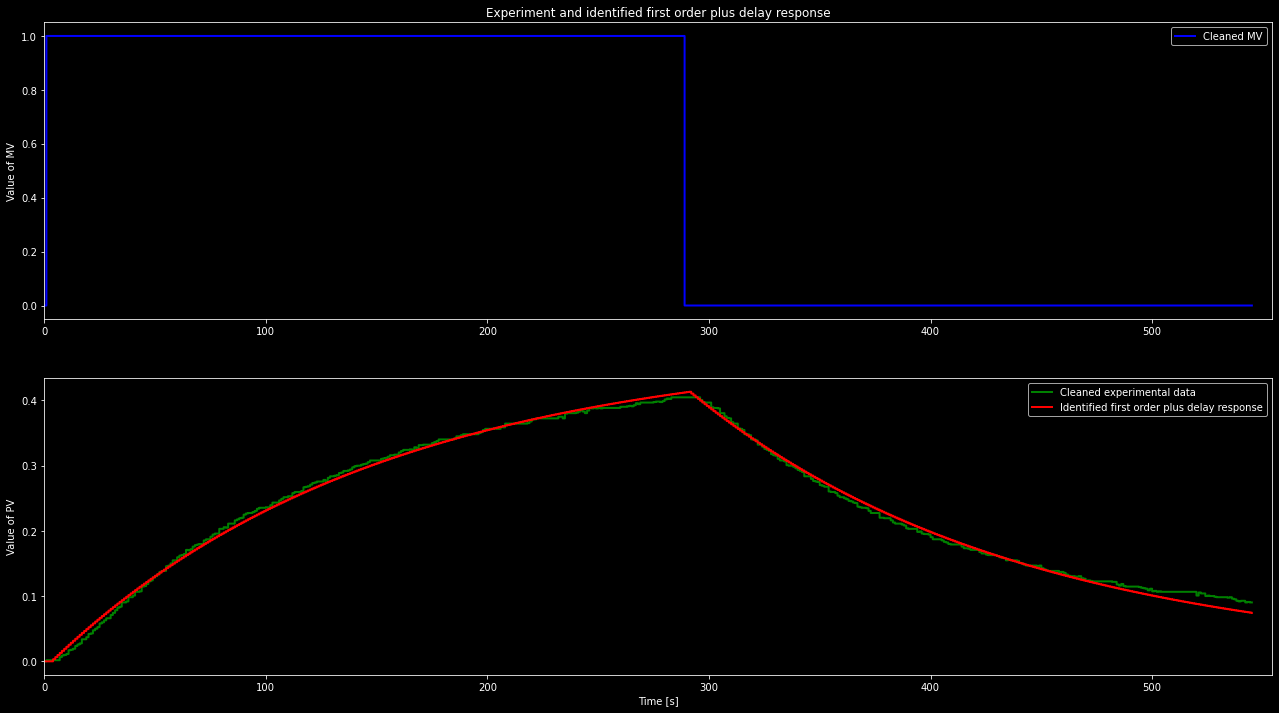

In [16]:
if ExpVariable == 'MV':
    PV_FOPDT_model = FOPDT(MVm,K,T,theta,Ts)
else:
    PV_FOPDT_model = FOPDT(DVm,K,T,theta,Ts)    

plt.figure(figsize = (22,12))

plt.subplot(2,1,1)
if ExpVariable == 'MV':
    plt.step(tm,MVm,'b-',linewidth=2,label='Cleaned MV',where='post')
    plt.ylabel('Value of MV')
else:
    plt.step(tm,DVm,'b-',linewidth=2,label='Cleaned DV',where='post')
    plt.ylabel('Value of DV') 
    
plt.title('Experiment and identified first order plus delay response')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

plt.subplot(2,1,2)
plt.step(tm,PVm,'g-',linewidth=2,label='Cleaned experimental data',where='post')
plt.step(tm,PV_FOPDT_model,'r-',linewidth=2,label='Identified first order plus delay response',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

### GRAPH METHODS 

#### Simple Broida 

In [17]:
TSim = 550
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 1, 295 :0}

t = []
MV = []

# Parameters
Kp = 0.4
T = 143.06
theta = 6.33

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV_simple_broida = FOPDT(MV,Kp,T,theta,Ts)

#### Complex Broida

In [18]:
TSim = 550
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 1, 295 :0}

t = []
MV = []
# Parameters
Kp = 0.4
T = 97.46
theta = 13.69

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV_broida = FOPDT(MV,Kp,T,theta,Ts)

#### Van den Grinten

In [19]:
help(SOPDT)

Help on function SOPDT in module package_DBR:

SOPDT(MV, Kp, T1, T2, theta, Ts, MVInit=0, PVInit=0, method='EBD')
    The function "SOPDT" DOES NOT need to be included in a "for or while loop": this block is for offline use.
    
    :MV: input vector
    :Kp: process gain
    :T1: first (or main) lag time constant [s]
    :T2: second lag time constant [s]    
    :theta: delay [s]
    :Ts: sampling period [s]
    :MVInit: (optional: default value is 0)    
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
        
    :return: simulated SOPDT output vector         
    
    The function "SOPDT" returns the simulated SOPDT output vector from the input vector "MV" and the input parameters.



#### Plot all results

In [20]:
TSim = 550
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: True, 295 :False}

t = []
MV = []

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)

PV_SOPDT_model = SOPDT(MV,0.46575892823243076, 132.04151002516983, 7.647730018039972, 0.0004910330468864688, Ts  )

ValueError: x and y must have same first dimension, but have shapes (5501,) and (546,)

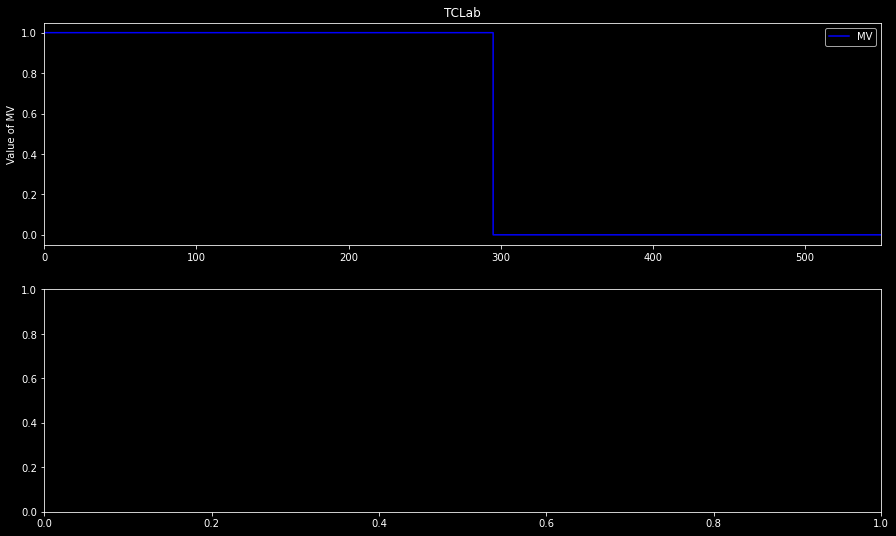

In [27]:
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('TCLab')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)

plt.step(t,PVm, 'g-', linewidth=2,label='Cleaned experimental data',where='post')
plt.step(t,PV_SOPDT_model, linewidth=2,label='Identified second order plus delay response',where='post')
plt.step(t,PV_FOPDT_model, linewidth=2,label='Identified first order plus delay response',where='post')
plt.step(t,PV_simple_broida,'r-',label='FOPDT Simple Broida',where='post')
plt.step(t,PV_broida, label='FOPDT Broida',where='post')

plt.ylabel('Value of PV [°C]')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim]) 



## BODE DIAGRAMS

#### Load processes values

In [31]:
#Identified FOPDT
P1 = Process({})
P1.parameters['Kp'] = 0.48398989727689795
P1.parameters['T'] = 14.927471000887966
P1.parameters['theta'] = 0.23565498038903543

#Identified SOPDT
P2 = Process({})
P2.parameters['Kp'] = 0.46575892823243076
P2.parameters['Tlag1'] = 132.04151002516983
P2.parameters['Tlag2'] = 7.647730018039972
P2.parameters['theta'] = 0.0004910330468864688

#Complex Broida
P3 = Process({})
P3.parameters['Kp'] = 0.4
P3.parameters['T'] = 97.46
P3.parameters['theta'] = 13.69

#Simple Broida
P4 = Process({})
P4.parameters['Kp'] = 0.4
P4.parameters['T'] = 143.06
P4.parameters['theta'] = 6.33

#Strejc
P5 = Process({})
P5.parameters['Kp'] = 0.4
P5.parameters['T'] = 136.73
P5.parameters['theta'] = 0.031388

#### Plot

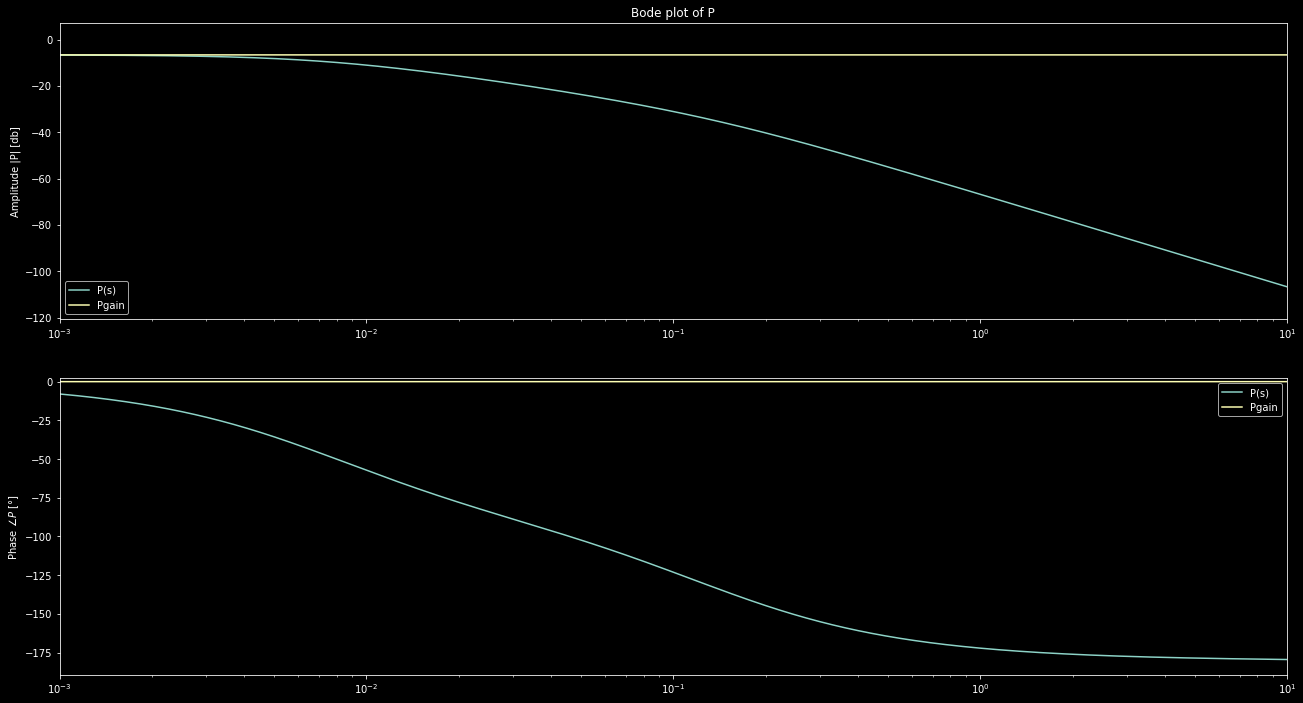

In [33]:
omega = np.logspace(-3, 1, 10000)
Bode(P2, omega )
# Bode(P1, omega )
# Bode(P2, omega )
# Bode(P3, omega )
# Bode(P4, omega )

### MARGINS

#### PID values

In [ ]:
C = Controller({}) 
C.parameters['Kc'] = 3.785622825343554
C.parameters['Ti'] = 139.6892400432098
C.parameters['Td'] = 7.229030808202924
C.parameters['alpha'] = 0.1

#### Plot

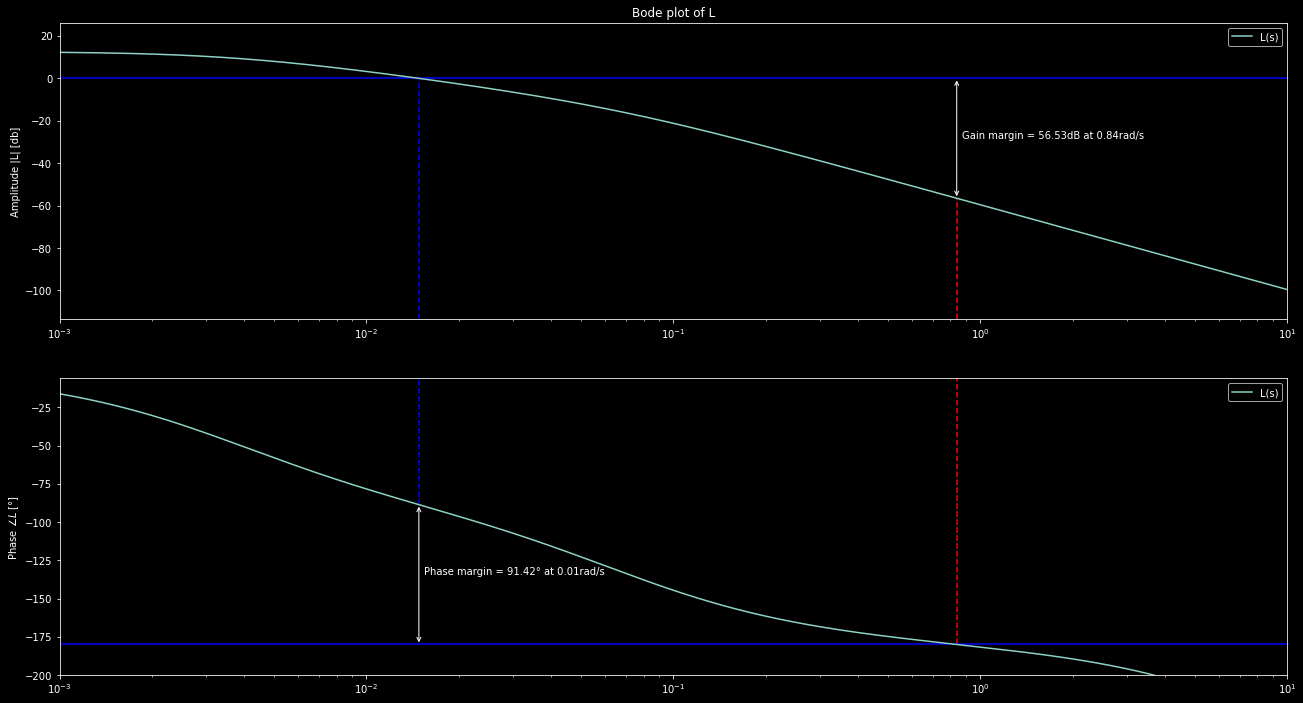

In [ ]:
StabilityMargins(P2,C,omega)

## PID

#### Without IMC tuning

#### Settings

In [ ]:
TSim = 100
Ts = 0.05
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0,85:5}
ManPath = {0: 0}
MVFFpath = {0: 0}

Kc = 1
Ti = 10
Td = 1
alpha = 0.9

MVMin = 0
MVMax = 100

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []

MV = []
MVP = []
MVI = []
MVD = []
E = []

ManFF = 0
PVInit = 0

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVFFpath,t,MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
  

#### Plot

(0.0, 100.0)

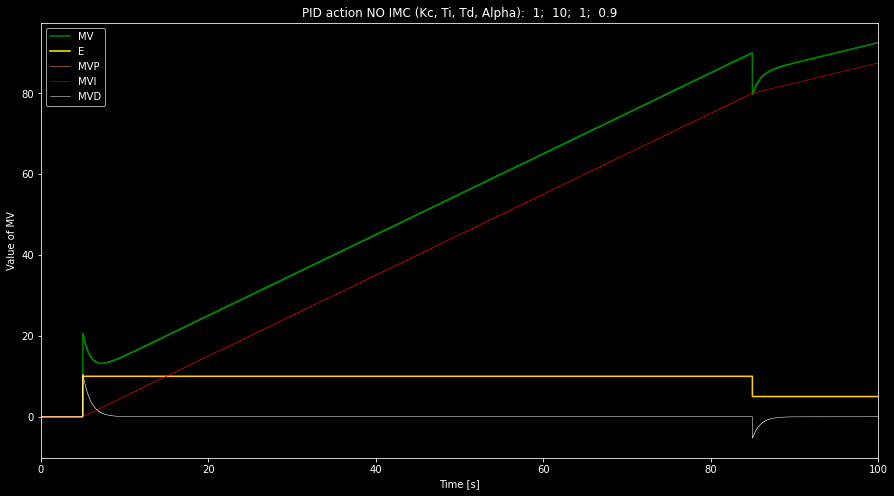

In [ ]:
  
plt.figure(figsize = (15,8))
plt.title("PID action NO IMC (Kc, Ti, Td, Alpha):  "+ str(Kc)+ ";  " + str(Ti)+ ";  "+ str(Td)+ ";  "+ str(alpha))
plt.step(t,MV,'g-',label='MV',where='post')
plt.step(t,E,'yellow',label='E',where='post')
plt.step(t,MVP,'orange',label='MVP',where='post',linewidth=0.5)
plt.step(t,MVI,'red',label='MVI',where='post',linewidth=0.5)
plt.step(t,MVD,'white',label='MVD',where='post',linewidth=0.5)
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

#### With IMC tuning

#### Settings

In [ ]:
TSim = 100
Ts = 0.05
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0,85:5}
ManPath = {0: 0}
MVFFpath = {0: 0}

Kp = 0.46575892823243076
T1p = 132.04151002516983
T2p = 7.647730018039972
thetap = 0.0004910330468864688

gamma = 0.9 
Kc,Ti,Td = IMC_tuning(Kp,T1p,T2p,thetap,gamma,'SOPDT')
print(Kc,Ti,Td)
alpha = 1
MVMin = 0
MVMax = 100

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []


MV = []
MVP = []
MVI = []
MVD = []
E = []

ManFF = 0
PVInit = 0

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPpath,t,SP)
    SelectPath_RT(PVpath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVFFpath,t,MVFF)
    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')


2.523753764240984 139.6892400432098 7.229030808202924


#### Plot

(0.0, 100.0)

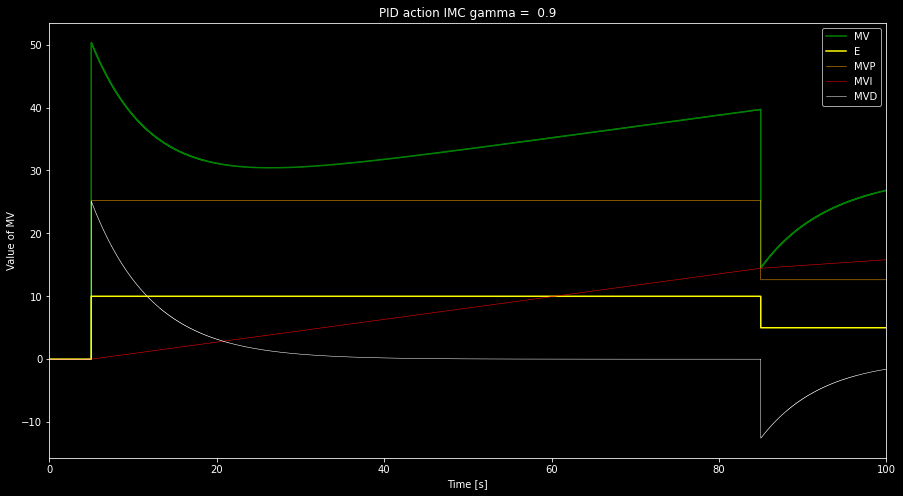

In [ ]:
    
plt.figure(figsize = (15,8))
#plt.title("PID action IMC (Kc, Ti, Td, Alpha):  "+ str(Kc)+ ";  " + str(Ti)+ ";  "+ str(Td)+ ";  "+ str(alpha))
plt.title("PID action IMC gamma =  "+ str(gamma))
plt.step(t,MV,'g-',label='MV',where='post')
plt.step(t,E,'yellow',label='E',where='post')
plt.step(t,MVP,'orange',label='MVP',where='post',linewidth=0.5)
plt.step(t,MVI,'red',label='MVI',where='post',linewidth=0.5)
plt.step(t,MVD,'white',label='MVD',where='post',linewidth=0.5)
plt.ylabel('Value of MV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

## LEAD LAG

(0.0, 50.0)

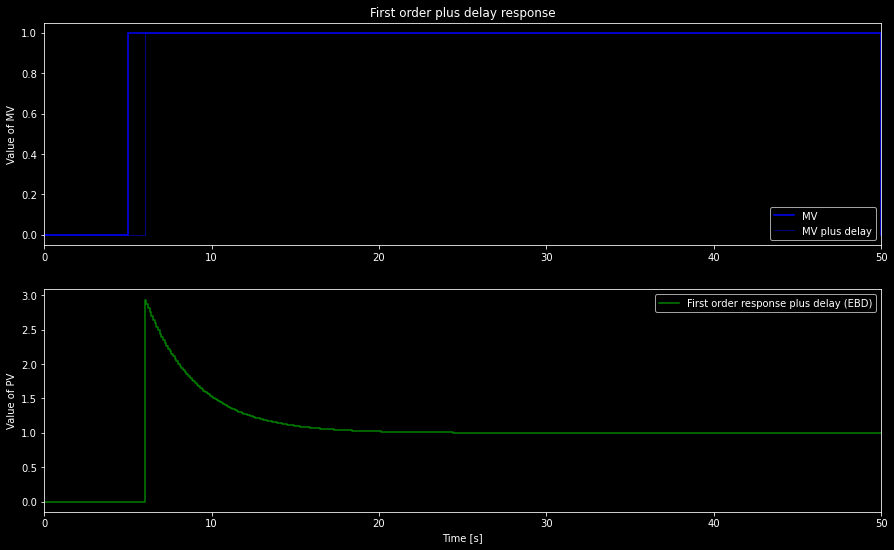

In [ ]:
TSim = 50
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, TSim: 0}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
TLead = 9
TLag = 3
theta = 1

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    Lead_Lag_RT(MVDelay,Kp,TLead,TLag,Ts,PV_EBD,PVInit=0,method = 'EBD')
    #LeadLag_RT(MVDelay,Kp,TLead,TLag,Ts,PV_EFD,0,'EFD')
    #LeadLag_RT(MVDelay,Kp,TLead,TLag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
# plt.step(t,PV_EFD,'lime',label='First order response plus delay (EFD)',where='post')
# plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])